In [1]:
import shapefile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ctr = shapefile.Reader('./ZillowNeighborhoods-NY')

In [3]:
geoms = ctr.shapeRecords()

In [4]:
len(geoms)

266

In [5]:
df = pd.read_csv("../JFK_dropoff.csv")

In [6]:
# RGB colors:   
rgb = 20* [(128,0,0),(139,0,0),(165,42,42),(178,34,34),(220,20,60),(255,0,0),(255,99,71),(255,127,80),(205,92,92),
      (240,128,128),(233,150,122),(250,128,114),(255,160,122),(255,69,0),(255,140,0),(255,165,0),(255,215,0),
      (184,134,11),(218,165,32),(238,232,170),(189,183,107)]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts:  
for i in range(len(rgb)):    
    r, g, b = rgb[i]    
    rgb[i] = (r / 255., g / 255., b / 255.)  

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


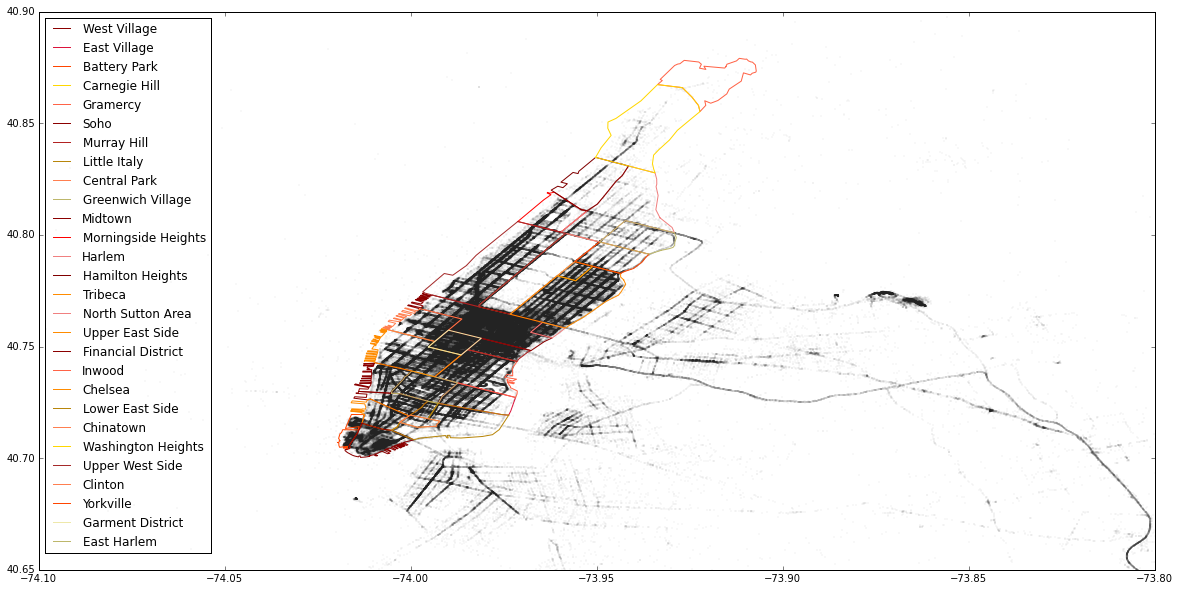

In [7]:
plt.figure(figsize=(20,10))

for _, geom in enumerate(geoms):
    if geom.record[1] == 'New York':
        X = []
        Y = []
        for point in geom.shape.points:
            X.append(point[0])
            Y.append(point[1])
            
        plt.plot(X, Y, color = rgb[_], label = geom.record[3])
        plt.xlim(-74.1,-73.8)
        plt.ylim(40.65,40.9)
        
plt.scatter(df['pickup_longitude'],df['pickup_latitude'],marker='.',s=0.005)
plt.xlim(-74.1,-73.8)
plt.ylim(40.65,40.9)
plt.legend(loc='upper left')
#plt.show()
plt.savefig('Zillow_Manhattan.png')

In [8]:
df.head()

,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,pickup_longitude,pickup_latitude
0,2,2013-12-08 21:33:00,2013-12-08 22:05:00,1,1920,-73.994896,40.755566
1,1,2013-12-05 19:06:00,2013-12-05 19:39:00,1,1980,-73.873177,40.773911
2,2,2013-12-03 08:47:00,2013-12-03 09:38:00,2,3060,-73.995277,40.764938
3,2,2013-12-03 09:14:00,2013-12-03 09:46:00,1,1920,-73.985893,40.750988
4,2,2013-12-05 18:26:00,2013-12-05 19:21:00,5,3300,-73.970840,40.765831


In [9]:
df.dtypes

rate_code              int64
pickup_datetime       object
dropoff_datetime      object
passenger_count        int64
trip_time_in_secs      int64
pickup_longitude     float64
pickup_latitude      float64
dtype: object

In [10]:
len(df)

1145992

In [11]:
df.isnull().any()

rate_code            False
pickup_datetime      False
dropoff_datetime     False
passenger_count      False
trip_time_in_secs    False
pickup_longitude     False
pickup_latitude      False
dtype: bool

In [147]:
import psycopg2

In [148]:
db = psycopg2.connect(database='iwonapawelczak')

In [149]:
cursor = db.cursor()

In [135]:
cursor.execute("SELECT NY_neighborhoods.city as city,\ 
                   NY_neighborhoods.name as neighborhood,\
                   jfk_pickup.rate_code,\
                   jfk_pickup.passenger_count,\ 
                   jfk_pickup.trip_time_in_secs,\
                   jfk_pickup.pickup_datetime,\
                   jfk_pickup.dropoff_datetime \
                   FROM NY_neighborhoods INNER JOIN jfk_pickup \
                   ON ST_CONTAINS(ST_Transform(NY_neighborhoods.geom,4326), jfk_pickup.the_geom);")

In [136]:
header = ['city', 'neighboorhood', 'rate_code','passenger_count','trip_time_in_secs','pickup_datetime',\
         'dropoff_datetime']

df_jfkd = pd.DataFrame(cursor.fetchall(), columns = header)

In [137]:
df_jfkd.to_csv('neighborhood_jfk_pickup.csv')

In [125]:
df_jfkd.head()

,city,neighboorhood,rate_code,passenger_count,trip_time_in_secs,pickup_datetime,dropoff_datetime
0,New York City-Manhattan,West Village,1,1,2880,2013-12-13 13:38:00,2013-12-13 14:26:00
1,New York City-Manhattan,West Village,1,1,1363,2013-12-15 13:37:52,2013-12-15 14:00:36
2,New York City-Manhattan,West Village,1,1,2160,2013-07-12 08:19:00,2013-07-12 08:55:00
3,New York City-Manhattan,West Village,1,1,1200,2013-09-29 10:13:00,2013-09-29 10:33:00
4,New York City-Manhattan,West Village,1,1,2986,2013-05-02 10:44:00,2013-05-02 11:34:00
